In [1]:
import numpy as np                        # Math
import scipy.stats                        # Statistics
from matplotlib import pyplot as plt      # Plots

Read the file

In [2]:
import requests

# Download file
r = requests.get('https://user-web.icecube.wisc.edu/~grbweb_public/Summary_table.txt')
with open("Summary_table.txt", 'wb') as f:
    f.write(r.content)

# Read content
data = np.loadtxt("Summary_table.txt", dtype='str',unpack='True')

# Read headers
with open("Summary_table.txt",'r') as f:
    names= np.array([n.strip().replace(" ","_") for n in f.readlines()[1].replace("#","").replace("\n","").lstrip().split('    ') if n.strip()!=''])


In [3]:
names

array(['GRB_name', 'GRB_name_Fermi', 'T0', 'ra', 'decl', 'pos_error',
       'T90', 'T90_error', 'T90_start', 'fluence', 'fluence_error',
       'redshift', "'T100'", 'GBM_located', 'mjd_(T0)'], dtype='<U14')

In [4]:
T90=np.array(data[6],dtype=float)
#print(T90)
ra = np.array(data[3],dtype=float)
decl = np.array(data[4],dtype=float)
fluence = np.array(data[9],dtype=float)

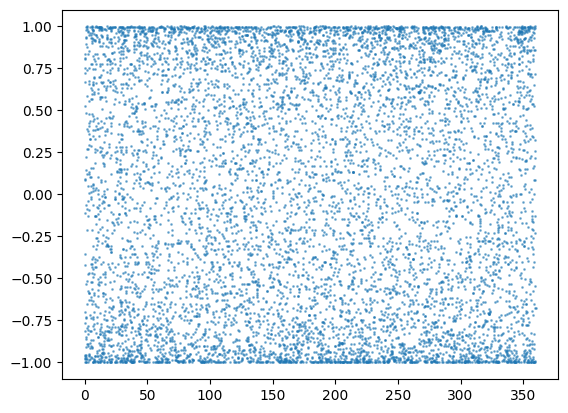

In [5]:
plt.scatter(ra, np.cos(decl), s = 1, alpha=0.5)
plt.show()

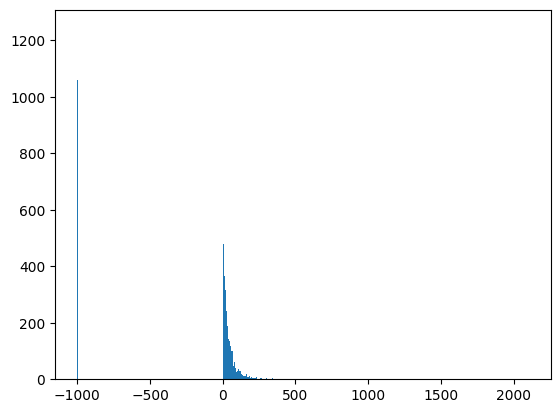

In [6]:
nbins = 1000
plt.hist(T90, bins=nbins, color=None, label=None)
#plt.xlim(-10, 400)
plt.show()

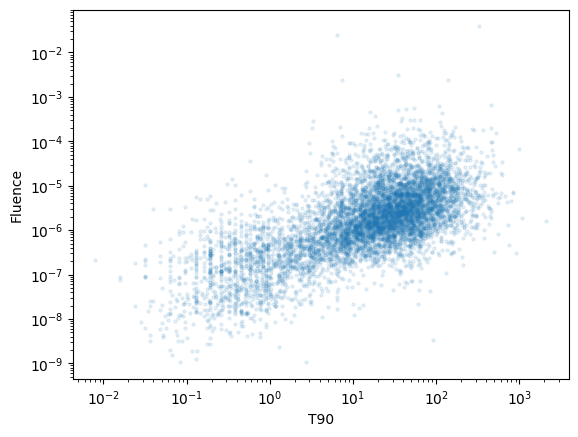

In [61]:
mask = (T90 > 0) & (fluence > 0)
T90_filt = T90[mask]
fluence_filt = fluence[mask]
plt.scatter(T90_filt, fluence_filt, s = 5, alpha = 0.1)
plt.xlabel('T90')
plt.ylabel('Fluence')
plt.loglog()
plt.show()

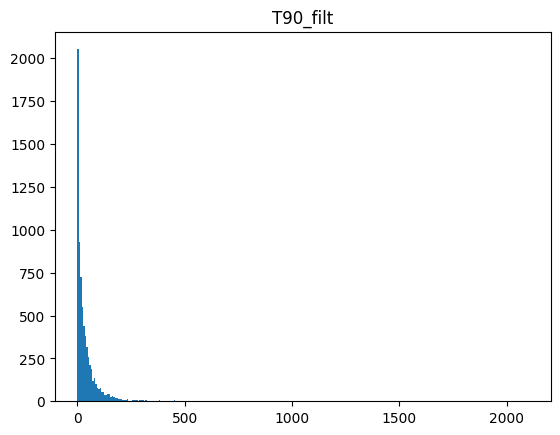

In [66]:
nbins = 300
plt.hist(T90_filt, bins=nbins, color=None, label=None)
plt.title('T90_filt')
plt.show()

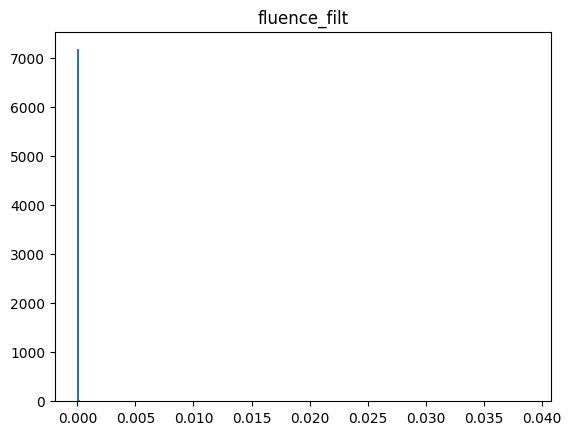

In [67]:
nbins = 300
plt.hist(fluence_filt, bins=nbins, color=None, label=None)
plt.title('fluence_filt')
plt.show()

### Kmeans

#### 2 clusters

Sum of squared distances of samples to their closest cluster center (weighted): 22439.899217047434

Number of points in cluster 0: 1963
Number of points in cluster 1: 5274
Number of points in cluster 1: 5274



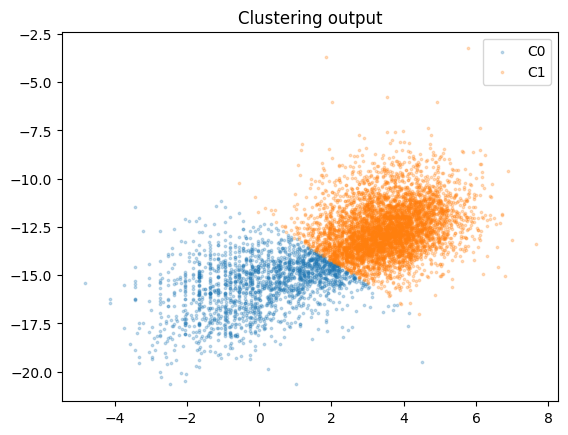

In [31]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

X = np.array([np.log(T90_filt), np.log(fluence_filt)]).T
#print(X)

clf = KMeans(n_clusters=2, n_init='auto') #Try 2 clusters to start with
clf.fit(X)
centers = clf.cluster_centers_ #location of the clusters
labels = clf.predict(X) #labels for each of the points
inertia = clf.inertia_
print('Sum of squared distances of samples to their closest cluster center (weighted): ' + str(inertia))
print('')
print('Number of points in cluster 0: ' + str(np.count_nonzero(labels == 0)))
print('Number of points in cluster 1: ' + str(np.count_nonzero(labels == 1)))
print('')

# plot the data color-coded by cluster id
colors = ['C0', 'C1']
for ii in range(2):
    plt.scatter(X[labels==ii,0], X[labels==ii,1], 
                color=colors[ii],s = 3, alpha=0.25, label = 'C'+str(ii))

# To get some information on these try:
# kmeans?
# help(clf)
plt.legend()
plt.title('Clustering output');

In [27]:
#KMeans?

#### 3 clusters

Sum of squared distances of samples to their closest cluster center (weighted): 15026.553012914808

Number of points in cluster 0: 3183
Number of points in cluster 1: 1425
Number of points in cluster 2: 2629



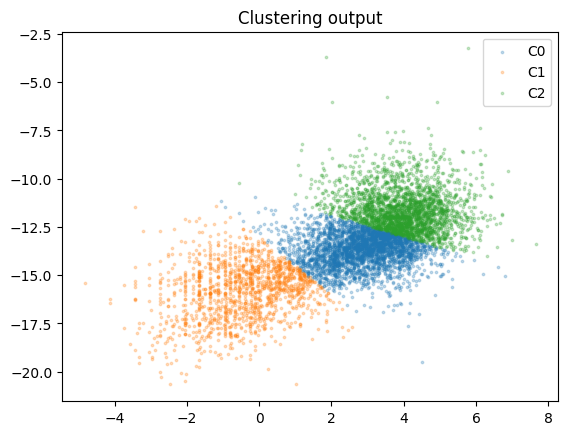

In [53]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

X = np.array([np.log(T90_filt), np.log(fluence_filt)]).T
#print(X)

clf = KMeans(n_clusters=3, n_init='auto') #Try 2 clusters to start with
clf.fit(X)
centers = clf.cluster_centers_ #location of the clusters
labels = clf.predict(X) #labels for each of the points
inertia = clf.inertia_
print('Sum of squared distances of samples to their closest cluster center (weighted): ' + str(inertia))
print('')
print('Number of points in cluster 0: ' + str(np.count_nonzero(labels == 0)))
print('Number of points in cluster 1: ' + str(np.count_nonzero(labels == 1)))
print('Number of points in cluster 2: ' + str(np.count_nonzero(labels == 2)))
print('')

# plot the data color-coded by cluster id
colors = ['C0', 'C1', 'C2']
for ii in range(3):
    plt.scatter(X[labels==ii,0], X[labels==ii,1], 
                color=colors[ii],s = 3, alpha=0.25, label = 'C'+str(ii))

# To get some information on these try:
# kmeans?
# help(clf)
plt.legend()
plt.title('Clustering output');

#### 12 clusters

Sum of squared distances of samples to their closest cluster center (weighted): 4850.800374916391

Number of points in cluster 0: 1212
Number of points in cluster 1: 296
Number of points in cluster 2: 723



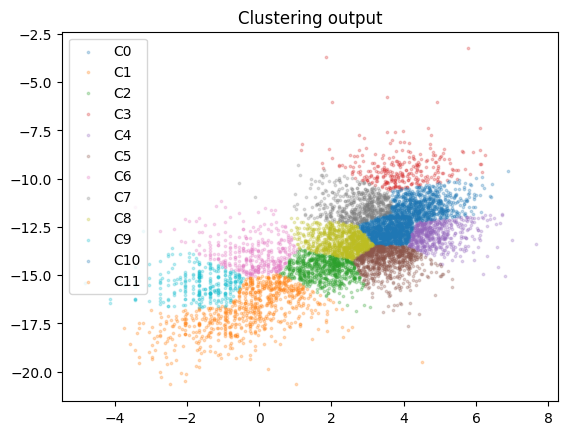

In [54]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

X = np.array([np.log(T90_filt), np.log(fluence_filt)]).T
#print(X)

clf = KMeans(n_clusters=12, n_init='auto') #Try 2 clusters to start with
clf.fit(X)
centers = clf.cluster_centers_ #location of the clusters
labels = clf.predict(X) #labels for each of the points
inertia = clf.inertia_
print('Sum of squared distances of samples to their closest cluster center (weighted): ' + str(inertia))
print('')
print('Number of points in cluster 0: ' + str(np.count_nonzero(labels == 0)))
print('Number of points in cluster 1: ' + str(np.count_nonzero(labels == 1)))
print('Number of points in cluster 2: ' + str(np.count_nonzero(labels == 2)))
print('')

# plot the data color-coded by cluster id
colors = ['C0', 'C1', 'C2', 'C3','C4','C5','C6','C7','C8','C9','C10','C11','C12']
for ii in range(12):
    plt.scatter(X[labels==ii,0], X[labels==ii,1], 
                color=colors[ii],s = 3, alpha=0.25, label = 'C'+str(ii))

# To get some information on these try:
# kmeans?
# help(clf)
plt.legend()
plt.title('Clustering output');

### Mean-shift

In [68]:
#Execute this cell to determine the bandwidth
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

bwrange = np.linspace(0.01,1.0, 40) # Test 30 bandwidths from 0.1 to 1.0
#print(bwrange)
K = 5 # Do 5-fold cross validation
grid = GridSearchCV(KernelDensity(), {'bandwidth': bwrange}, cv= K) # Try each bandwidth with K-folds
grid.fit(fluence[:, None]) #Fit the histogram data that we started the lecture with.
h_opt = grid.best_params_['bandwidth']
print(h_opt)

KeyboardInterrupt: 

In [49]:
# Compute the Mean-shift clustering
from sklearn.cluster import MeanShift

scaler = preprocessing.StandardScaler()
bandwidth = 0.5
#bandwidth = estimate_bandwidth(X_reduced) # this takes a long time...beware
ms = MeanShift(bandwidth=bandwidth, 
               bin_seeding=True, 
               cluster_all=False)
ms.fit(scaler.fit_transform(X))

MeanShift(bandwidth=0.5, bin_seeding=True, cluster_all=False)

In [52]:
#MeanShift?

[-1  0  1  2  3  4  5  6  7  8  9 10 11]
0.5
number of estimated clusters : 12


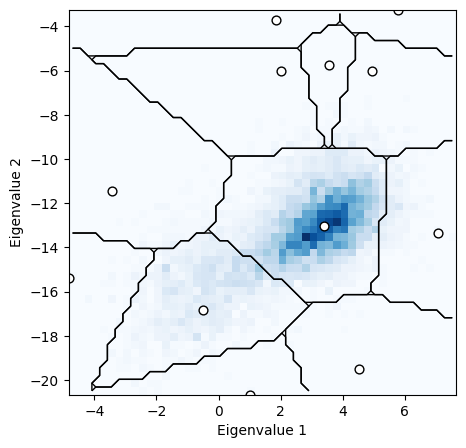

In [51]:
labels_unique = np.unique(ms.labels_)
n_clusters = len(labels_unique[labels_unique >= 0])
print(labels_unique)
print(bandwidth)
print("number of estimated clusters :", n_clusters)

# Make some plots
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

# Compute a 2D histogram  of the input
H, xedges, yedges = np.histogram2d(X[:,0], X[:,1], 50)

# plot density
ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='auto',
          extent=[xedges[0], xedges[-1],
                  yedges[0], yedges[-1]],
          cmap='Blues')

# plot cluster centers
cluster_centers = scaler.inverse_transform(ms.cluster_centers_)
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
           s=40, c='w', edgecolors='k')

# plot cluster boundaries
x_centers = 0.5 * (xedges[1:] + xedges[:-1])
y_centers = 0.5 * (yedges[1:] + yedges[:-1])

Xgrid = np.meshgrid(x_centers, y_centers)
Xgrid = np.array(Xgrid).reshape((2, 50 * 50)).T

H = ms.predict(scaler.transform(Xgrid)).reshape((50, 50))

for i in range(n_clusters):
    Hcp = H.copy()
    flag = (Hcp == i)
    Hcp[flag] = 1
    Hcp[~flag] = 0

    ax.contour(x_centers, y_centers, Hcp, [-0.5, 0.5],
               linewidths=1, colors='k')
 
    H = ms.predict(scaler.transform(Xgrid)).reshape((50, 50))
    
ax.set_xlim(xedges[0], xedges[-1])
ax.set_ylim(yedges[0], yedges[-1])

ax.set_xlabel('Eigenvalue 1')
ax.set_ylabel('Eigenvalue 2')

plt.show()